References: 
https://pytorch.org/tutorials/beginner/blitz/cifar10_tutorial.html
https://www.deeplearningwizard.com/deep_learning/practical_pytorch/pytorch_feedforward_neuralnetwork/

In [16]:
import torch
import torch.nn as nn
import torchvision.transforms as transforms
import torchvision.datasets as dsets
import torch.nn.functional as F
import matplotlib.pyplot as plt

In [17]:
trainset = dsets.MNIST(root='./data', train=True, download=True, transform=transforms.ToTensor())
trainloader = torch.utils.data.DataLoader(dataset=trainset, batch_size=20, shuffle=True)

testset = dsets.MNIST(root='./data', train=False, transform=transforms.ToTensor())
testloader = torch.utils.data.DataLoader(dataset=testset, batch_size=20, shuffle=False)

In [18]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(784, 120) 
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = x.view(-1, 784)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        return self.fc3(x)
    
net = Net()
criteria = nn.CrossEntropyLoss()
learning_rate = 0.1
optimizer = torch.optim.SGD(net.parameters(), lr=learning_rate, momentum=0.1)

In [19]:
def testRun():
    total_loss = 0
    i = 0
    for data in testloader:
        inputs, labels = data
        outputs = net(inputs)
        loss = criteria(outputs, labels)
        total_loss += loss.item()
        # i += 1
    return total_loss/(i)

In [20]:
training = []
testing = []
for epoch in range(50):
    total_loss = 0
    for i, data in enumerate(trainloader,0):
        inputs, labels = data
        optimizer.zero_grad()
        outputs = net(inputs)
        loss = criteria(outputs, labels)
        loss.backward()
        optimizer.step()
        total_loss += loss.item()
    training.append(total_loss/(i+1))

In [26]:
for epoch in range(50):
    total_loss = 0
    i = 0
    for data in testloader:
        inputs, labels = data
        outputs = net(inputs)
        loss = criteria(outputs, labels)
        total_loss += loss.item()
        i += 1
    testing.append(total_loss/i)


In [27]:


def plot(array, title, x, y):
    plt.plot([i+1 for i in range(len(array))], array, label=title)
    plt.xlabel(x)
    plt.ylabel(y)
    plt.title(title)
    plt.legend()
    plt.show()

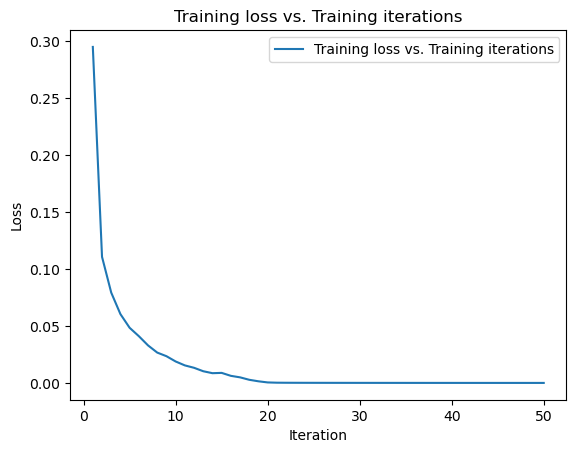

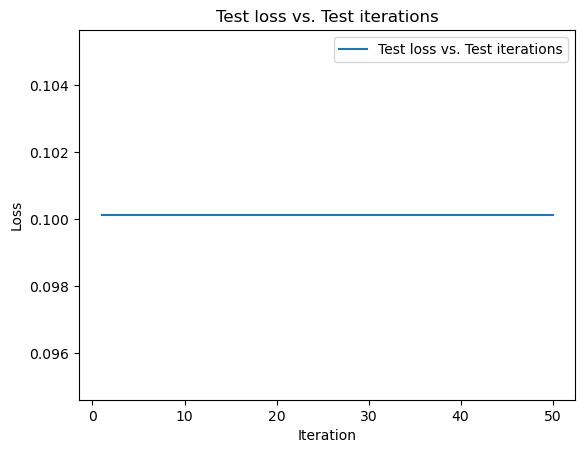

In [28]:
#Plotting Training and Testing Losses

plot(training, "Training loss vs. Training iterations", "Iteration", "Loss")
plot(testing, "Test loss vs. Test iterations", "Iteration", "Loss")